In [117]:
%load_ext autoreload
%autoreload 2

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
from torchvision import datasets, transforms
from tqdm import tqdm
from scipy.spatial.distance import euclidean

# import the project root
sys.path.insert(0, '../..')
from src.covertree import CoverTree 
from src.dyadictree import DyadicTree
from src.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
def load_dataset(flatten=False):
    num_points = 100
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    mnist_train = datasets.MNIST(root='../../datasets', train=True, download=True, transform=transform)
    X = np.stack([np.array(img[0].numpy()) for img in mnist_train][:num_points])  # shape: (num_points, 1, 28, 28)

    original_shape = X.shape
    if flatten:
        X = X.reshape(X.shape[0], -1)
    return X, original_shape    

X, original_shape = load_dataset(flatten=True)
p_n_points = X.shape[0]
print("X shape: %s" % str(X.shape))
print(p_n_points)

X shape: (100, 784)
100


In [119]:
python_covertree =  CoverTree(X, euclidean, leafsize=1)
mydiadic_tree    =  DyadicTree(python_covertree)

In [120]:
# print(mydiadic_tree.height)
# mydiadic_tree.grow_tree()

In [121]:
# mydiadic_tree.j_k_to_wavelet_node

In [122]:
# mydiadic_tree.plot_tree()

In [123]:
mydiadic_tree.grow_tree()

In [124]:
mydiadic_tree.grow_tree()

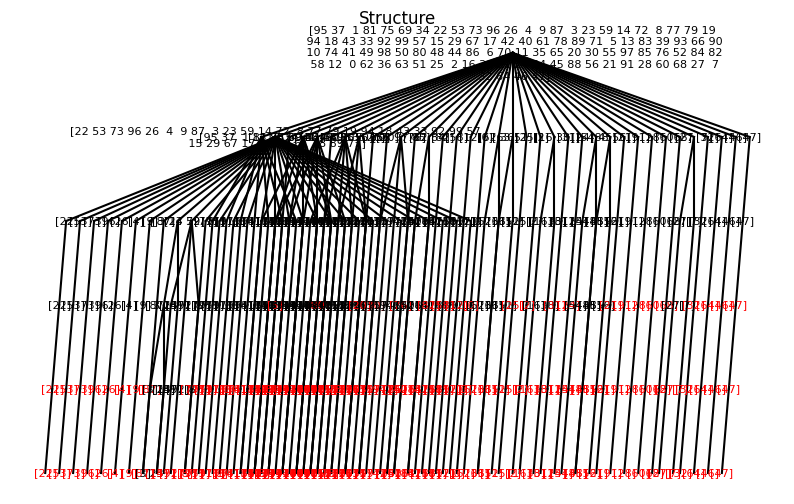

In [125]:
mydiadic_tree.plot_tree()

In [128]:
# Set up parameters for GMRA
height = mydiadic_tree.height
manifold_dims = np.ones(height, dtype=int) * 0
thresholds = np.zeros(height)
precisions = np.ones(height) * 1e-2
max_dim = X.shape[-1]
inverse = True

# Compute bases and wavelets on the DyadicTree
mydiadic_tree.make_basis(X, manifold_dims, max_dim, thresholds, precisions, inverse=inverse)
mydiadic_tree.make_wavelets(X, manifold_dims, max_dim, thresholds, precisions)

In [129]:
# Forward GMRA transform
gmra_q_coeff, leaves_j_k = mydiadic_tree.fgwt(X, manifold_dims, max_dim, thresholds, precisions)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 784 is different from 100)

In [ ]:
# Inverse GMRA transform (reconstruction)
x_recon = mydiadic_tree.igwt(gmra_q_coeff, leaves_j_k, X.shape)

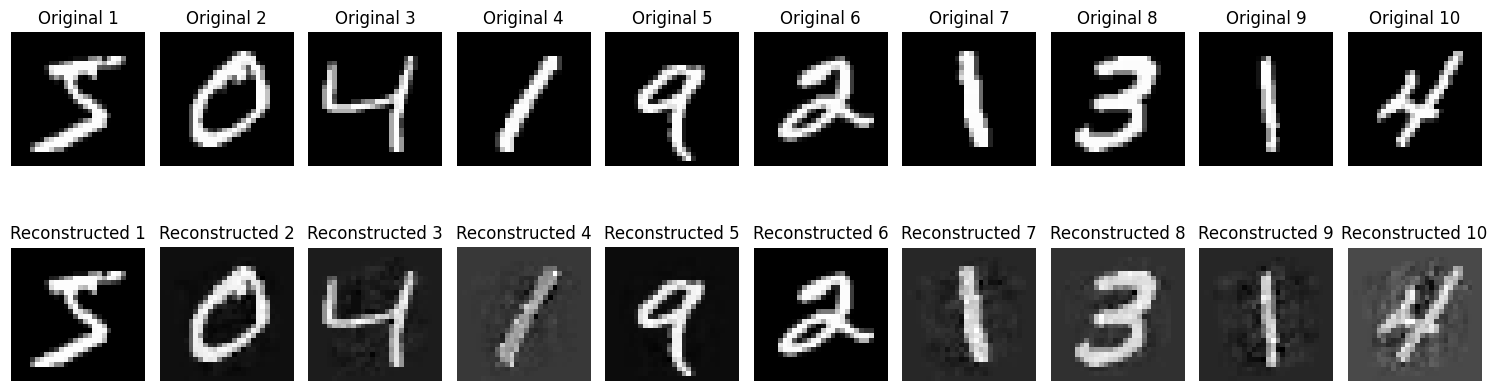

In [70]:
# plot x & x_recon for mnist in 2 row, take 5 images, remember to reshape to image

n_images = 10
fig, axs = plt.subplots(2, n_images, figsize=(15, 5))
for i in range(n_images):
    axs[0, i].imshow(X[i].reshape(original_shape[2:]), cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Original {i+1}')

    axs[1, i].imshow(x_recon[i].reshape(original_shape[2:]), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Reconstructed {i+1}')
plt.tight_layout()
plt.show()

In [71]:
# reconstruction error:
reconstruction_error = np.linalg.norm(X - x_recon, axis=1)
print("Reconstruction error (first 10):", reconstruction_error[:10])
print("Mean reconstruction error:", np.mean(reconstruction_error))

# snr signal to noise ratio
snr = 10 * np.log10(np.sum(X**2) / np.sum((X - x_recon)**2))
print("SNR:", snr)

Reconstruction error (first 10): [1.23138723e-06 5.08315376e-01 8.60821350e-01 3.36801552e+00
 2.47028286e-01 1.33437070e-06 1.19668754e+00 1.05434234e+00
 1.49644800e+00 3.18084230e+00]
Mean reconstruction error: 1.0109433462131328
SNR: 16.99633937493965
